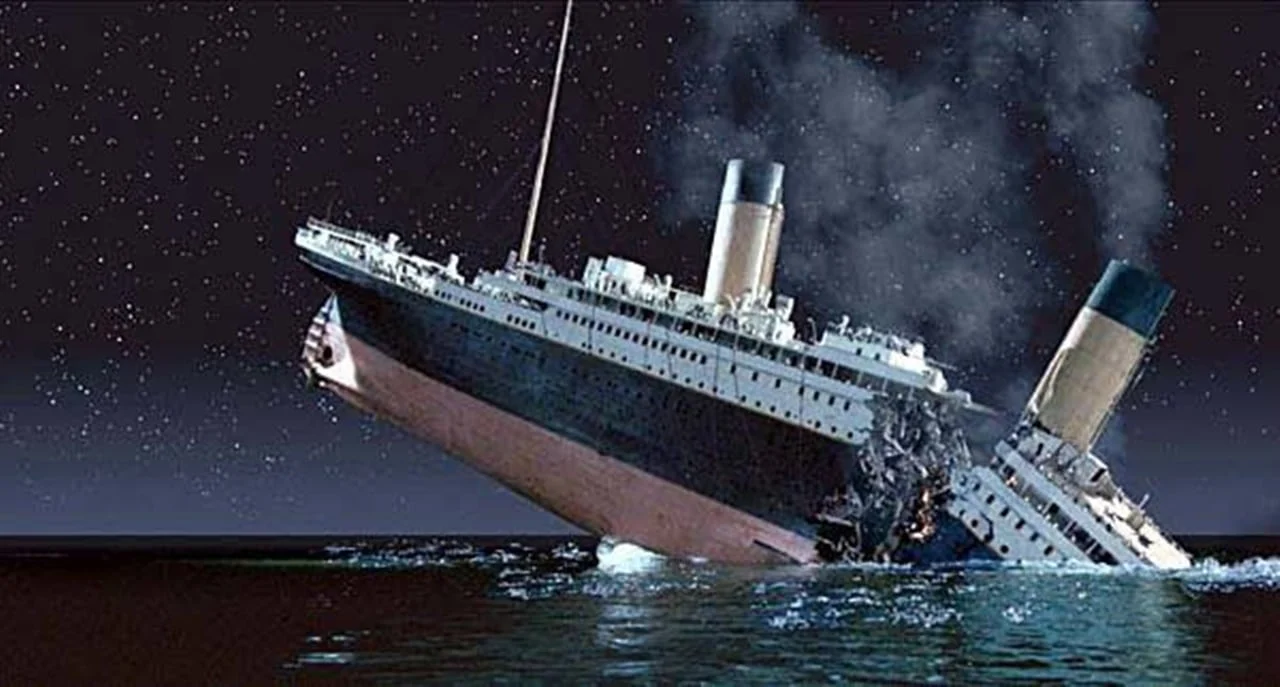

# BUSINESS UNDERSTANDING

[Naufrágio do RMS Titanic](https://pt.wikipedia.org/wiki/Naufr%C3%A1gio_do_RMS_Titanic)

[Uma linha do tempo do naufrágio do Titanic](https://www.greelane.com/pt/humanidades/hist%C3%B3ria--cultura/titanic-timeline-1779210/)

# DATA UNDERSTANDING

Titanic - Machine Learning from Disaster<br>
[Dataset](https://www.kaggle.com/c/titanic)

In [353]:
# METADADOS:
# Passenger ID: ID do passageiro (número único para cada um dos passageiros)
# Survived: sobrevivente (0 = Não, 1 = Sim) ---> VARIÁVEL TARGET
# Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
# Name: nome do passageiro
# Sex: Gênero do passageiro
# Age: Idade (em anos) do passageiro
# SibSp: Siblings = número de irmãos / Spouse = cônjuges a bordo do Titanic
# Parch: Parents = mãe ou/e pai / Children = filhos a bordo do Titanic
# Ticket: número do ticket
# Fare: tarifa da passagem
# Cabin: número da cabine

# Embarked: Porto de embarcação. Ordem de parada nos portos:
# S = Southampton (Inglaterra) - partida 10 de abril de 1912 12h;
# C = Cherbourg (França) - chegada 10 de abril de 1912 18h30 | partida 10 de abril de 1912 20h10;
# Q = Queenstown (Irlanda) - agora conhecida como Cobh - partida 11 de abril de 1912 13h30.
    # O Titanic inicia sua viagem através do Atlântico com destino a Nova York.

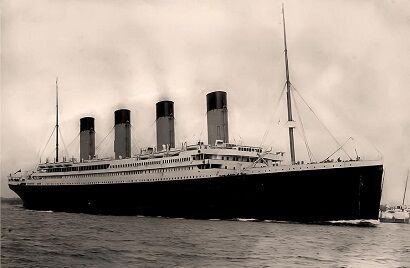

In [354]:
# Infomração complementar:
# 15 de abril de 1912 (2h20): O Titanic afunda.

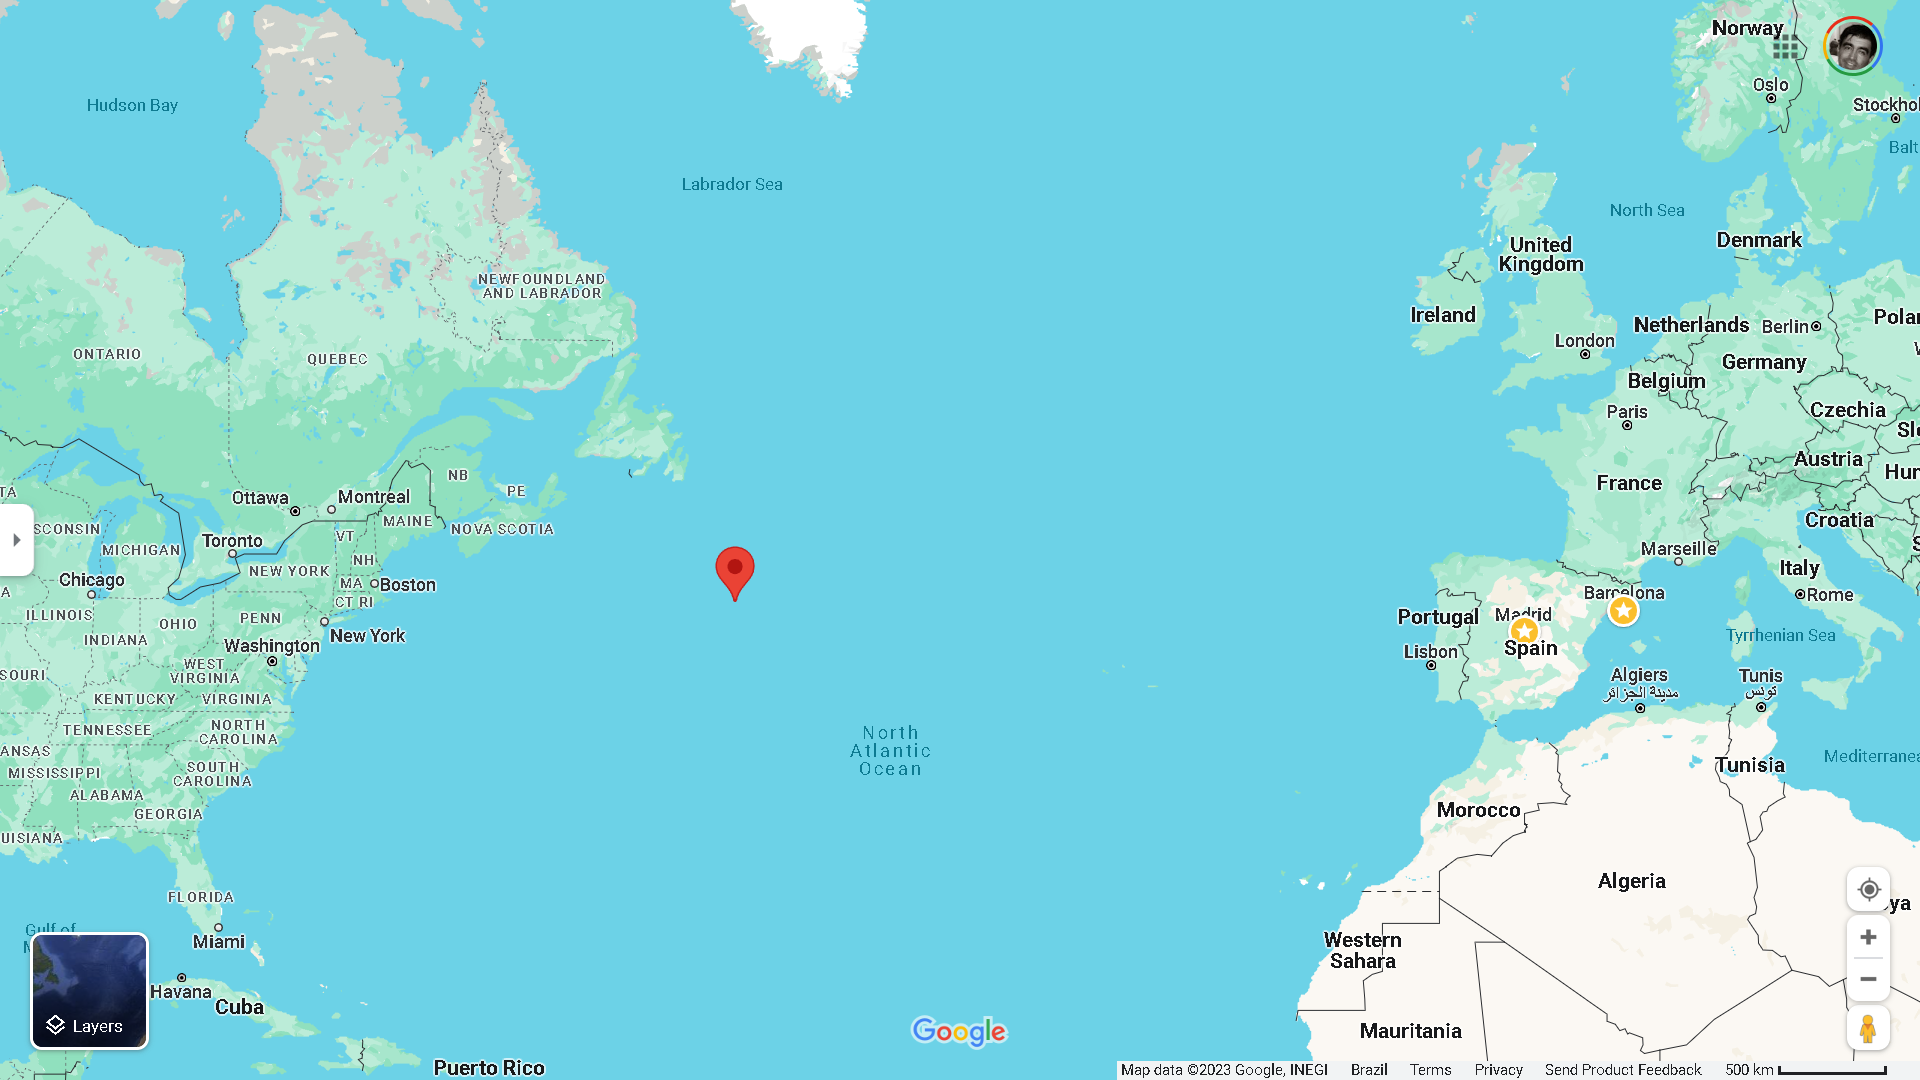

In [355]:
# Simulando um voo de origem e detino que o Titanic iria completar na etapa final da viagem

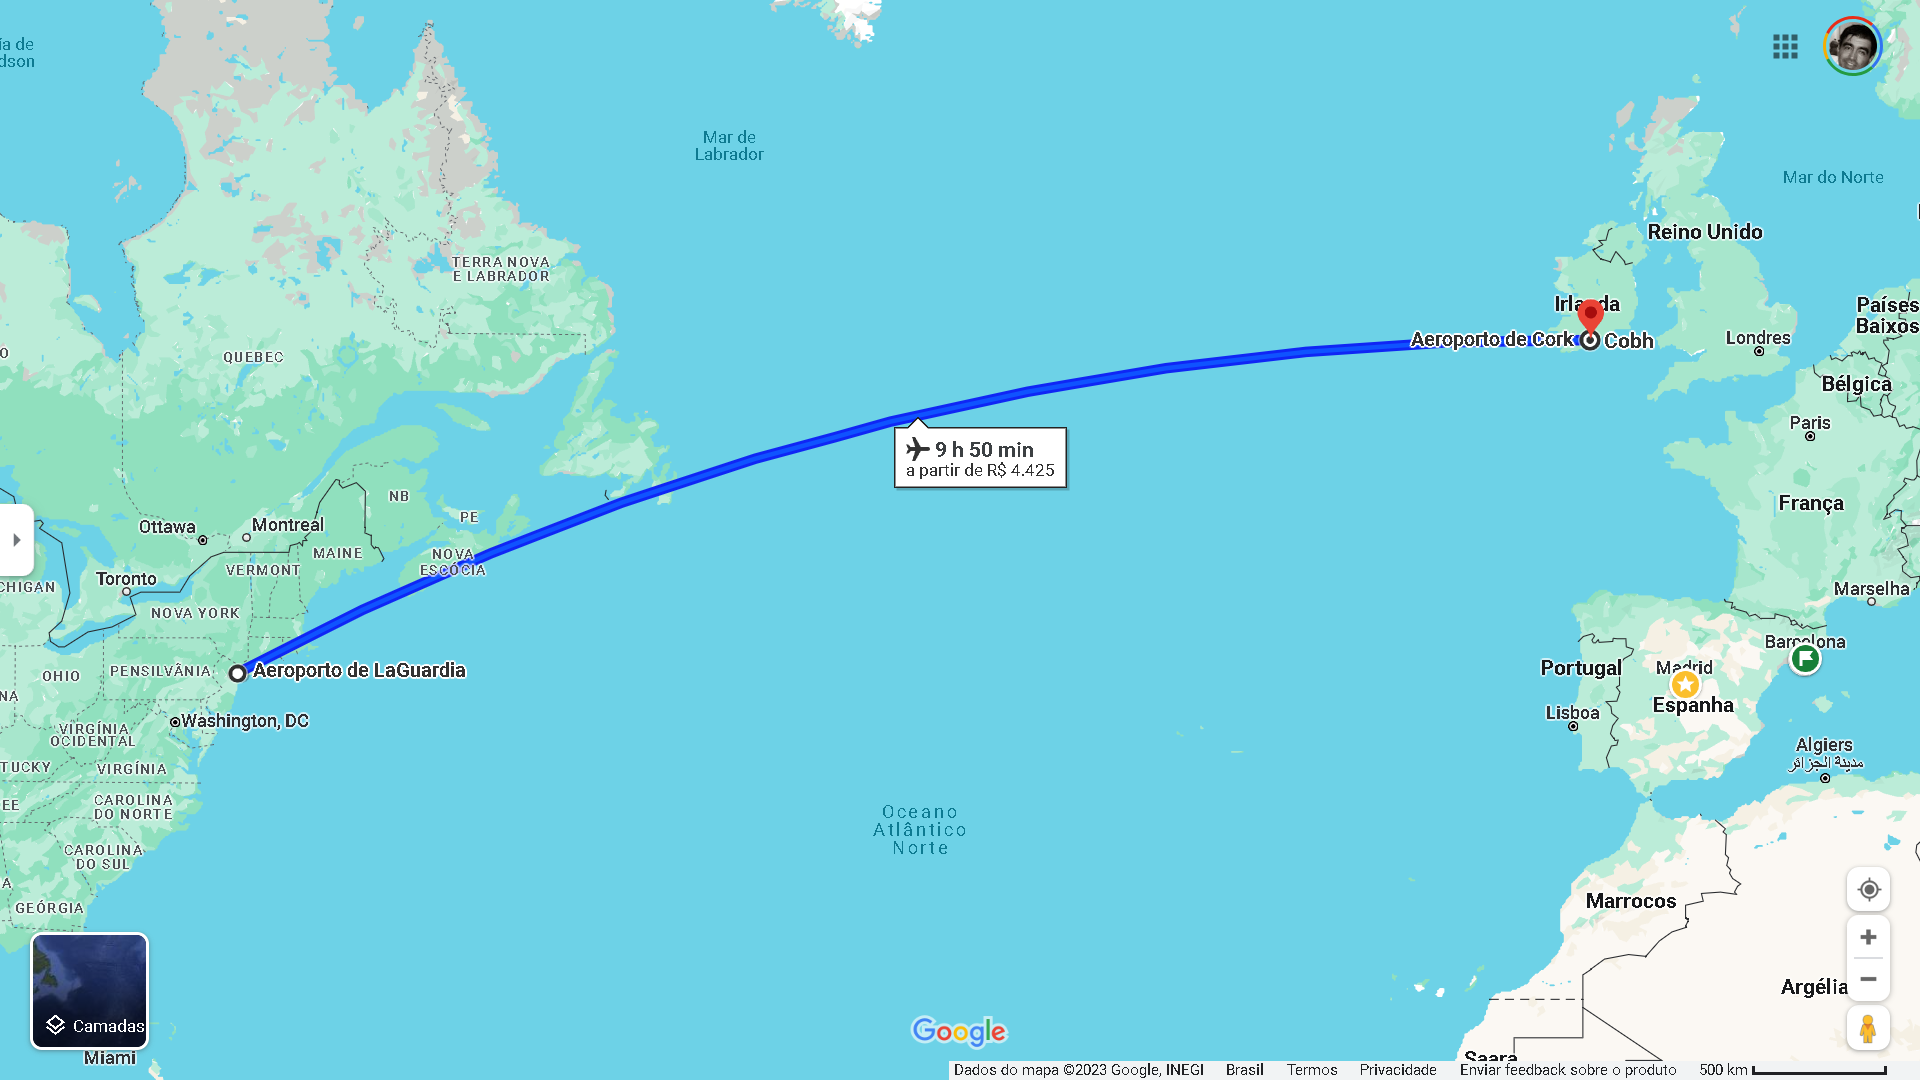

In [356]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   Fare          891 non-null    float64
 6   Embarked      891 non-null    object 
 7   Sex_bin       891 non-null    int64  
 8   familySize    891 non-null    int64  
 9   Title         891 non-null    object 
 10  Embarked_Q    891 non-null    int32  
 11  Embarked_S    891 non-null    int32  
 12  Title_Miss    891 non-null    int32  
 13  Title_Mr      891 non-null    int32  
 14  Title_Mrs     891 non-null    int32  
 15  Title_Person  891 non-null    int32  
 16  Pclass_2      891 non-null    int32  
 17  Pclass_3      891 non-null    int32  
dtypes: float64(2), int32(8), int64

# Title

In [357]:
# Predição de sobrevivemtes no naufráfio do Titanic

# Head

In [358]:
# Machine Learning - CLASSIFICAÇÃO - Prevendo o número de sobreviventes do Titanic
# by geanclm on 12/03/2022 at 18h14
# update by geanclm on 19/11/2023

# Local files

In [359]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\kaggle\Titanic

24/12/2023  20:39    <DIR>          .
21/12/2023  18:18    <DIR>          ..
16/12/2023  14:58    <DIR>          .ipynb_checkpoints
23/12/2023  11:58             3.258 CLASSIFICA€ÇO_Titanic_Kaggle_csv_1-2023-12-23.csv
24/12/2023  10:28         2.188.075 CLASSIFICA€ÇO_Titanic_Kaggle_csv_1.ipynb
24/12/2023  14:12             6.919 CLASSIFICA€ÇO_Titanic_Kaggle_csv_2-2023-12-24.csv
24/12/2023  20:39         3.416.036 CLASSIFICA€ÇO_Titanic_Kaggle_csv_2.ipynb
29/11/2023  09:13             3.258 gender_submission.csv
29/11/2023  09:13            18.221 rms-titanic-bill-cannon.jpg
29/11/2023  09:13            28.629 test.csv
29/11/2023  09:13         1.428.790 titanic.png
29/11/2023  09:13            93.134 titanic.webp
29/11/2023  09:13            61.194 train.csv
29/11/2023  09:13            52.097 Your First Entry.png
              11 arquivo(s)     

# Library installation

In [360]:
# !pip install ydata-profiling

# Import libs

In [469]:
import os

import pandas as pd
import numpy as np

# gerar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# função utilizada para registrar data e hora no nome do modelo salvo
# esse recurso serve para versionar cada novo modelo criado de acordo com a data em que foi gerado
from datetime import datetime

from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# trabalhar com os dados com rede neural
import tensorflow as tf

# Pré-processamento de dados para valores numéricos
# RobustScaler: Dimensiona os dados de acordo com estatísticas robustas, usando mediana e intervalo interquartil
# MinMaxScaler: Redimensiona os dados para um intervalo específico, normalmente entre 0 e 1
# StandardScaler: Padroniza os recursos removendo a média e escalonando desvio padrão igual a 1
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# validação cruzada
from sklearn.model_selection import cross_val_score

# função para MÉTRICA de validação do modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import KFold

# Validação
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import OneHotEncoder # aplicado para variável qualitaitiva nominal
from sklearn.preprocessing import OrdinalEncoder # aplicado para a variável qualitativa ordinal

# Load data

In [362]:
df_gender_submission = pd.read_csv('gender_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

# Exploratory Analysis

In [363]:
df_gender_submission.tail(3)

,PassengerId,Survived
415,1307,0
416,1308,0
417,1309,0


In [364]:
# Análise base train

In [365]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [366]:
df_train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [367]:
# Classe			    Preço em 1912 (Dólares)   Preço Atualizado (Dólares)
# Primeira Classe		$4.350			          $133.132
# Segunda Classe		$60			              $1.834
# Terceira Classe		$35			              $1.071
# fonte: https://usarover.com/titanic-ticket-price/

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [368]:
df_train.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [369]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [370]:
# Total de homens e mulheres na base df_train
df_train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [371]:
# Obs: Das 2200 pessoas a bordo, apenas 1178 puderam ser salvas pelos 20 botes salva-vidas espalhados pelo barco2.
# O RMS Carpathia foi o navio que resgatou os náufragos do Titanic, contando 712 sobreviventes1.
# Dos 712 sobreviventes resgatados pelo RMS Carpathia, a distribuição por gênero foi a seguinte:
# Homens: Cerca de 335 homens sobreviveram.
# Mulheres: Aproximadamente 277 mulheres foram salvas.
# Esses números refletem a proporção de sobreviventes entre os passageiros do Titanic,
# considerando a noite trágica em que o navio afundou após colidir com um iceberg no Atlântico Norte em 14 de abril de 1912.

# Análise da relação entre as variáveis
df_train.groupby(['Sex','Survived'])['Survived'].agg(['count'])

count
Sex    Survived       
female 0            81
       1           233
male   0           468
       1           109

In [372]:
# Primeira Classe:
# Luxo máximo: Passageiros desfrutam de cabines espaçosas, camas confortáveis e serviços personalizados.
# Restaurantes finos: Refeições gourmet e atendimento exclusivo. Áreas de lazer: Salões elegantes,
# bares sofisticados e espaços para relaxamento. Prioridade no embarque e desembarque.

# Segunda Classe:
# Executiva (ou Classe Premium)
# Conforto e privacidade: Cabines mais amplas que a classe econômica.
# Serviço diferenciado: Refeições de alta qualidade e atendimento atencioso.
# Acesso a lounges: Espaços exclusivos nos portos e aeroportos.

# Terceira Classe:
# Econômica
# Padrão: A maioria dos passageiros viaja nessa classe. Cabines compactas: Assentos reclináveis e espaço limitado.
# Refeições simples: Opções básicas de alimentação. Menos privacidade e comodidades.

 # - - - PONDO IMPORTANTE PARA VERIRICAR: a variável qualitativa ordinal "Pclass" tem semântica
# invertida em relação a sequencia numérica, ou seja, a classe 1 é mais relevante que a classe 3
# e isso precisa ser analisado junto aos resultados do modelo para verficar se o valor 3 está sendo considerado com maior enfase pelo modelo,
# pois isso reflete em um equivoco considerando a relidade do contexto de classe 1 ter mais luxo e conforto

# Análise da relação entre as classes dos passageiros e sobreviventes
df_train.groupby(['Pclass','Sex', 'Survived'])['Survived'].agg(['count'])

count
Pclass Sex    Survived       
1      female 0             3
              1            91
       male   0            77
              1            45
2      female 0             6
              1            70
       male   0            91
              1            17
3      female 0            72
              1            72
       male   0           300
              1            47

In [373]:
# Análise base test

In [374]:
df_test.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [375]:
df_test['Age'].tail(10)

408     NaN
409     3.0
410     NaN
411    37.0
412    28.0
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, dtype: float64

In [376]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [377]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Total de registros: 889
Quantidade de valores nulos: 2
Quantiadade de valores únicos: 3
Valores únicos: ['S' 'C' 'Q' nan]

Quantidade de cada tipo de dado da coluna 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Percentual de cada tipo em relação ao total da coluna 
Embarked
S    0.722783
C    0.188552
Q    0.086420
Name: count, dtype: float64

Agrupamento de dados em relação aos sobreviventes: 
Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: PassengerId, dtype: int64



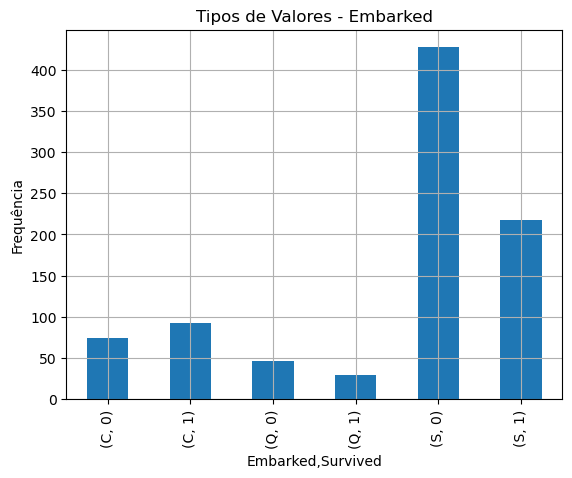

In [378]:
# Análise de quantitativo de passageiros de acordo com a coluna 'Survived'
def analisar (base, coluna, bool = True):    
    print (f'Total de registros: {base[coluna].value_counts().sum()}')    
    print (f'Quantidade de valores nulos: {base[coluna].isnull().sum()}')
    print (f'Quantiadade de valores únicos: {base[coluna].nunique()}')
    print (f'Valores únicos: {base[coluna].unique()}')
    print ('')
    print (f'Quantidade de cada tipo de dado da coluna \n{base[coluna].value_counts()}')
    print ('')
    print (f'Percentual de cada tipo em relação ao total da coluna \n{base[coluna].value_counts()/base.Sex.shape[0]}')
    print ('')
    print (f'Agrupamento de dados em relação aos sobreviventes: \n{base.groupby([coluna,"Survived"])["PassengerId"].count()}')    
    print ('')
    if bool == True:
        # base[coluna].value_counts().plot.bar(grid=True, title= f'Tipos de Valores - {coluna}', ylabel = 'Frequência');
        base.groupby([coluna,"Survived"])["PassengerId"].count().plot.bar(grid=True, title= f'Tipos de Valores - {coluna}', ylabel = 'Frequência');
    else:
        sns.displot(base[coluna], kde = True);
analisar(df_train, 'Embarked', True)

<center style="font-size:18pt; background-color:#c9d976">
    <br/>
        <b style="color: #033409">
            ydata_profiling
        </b>
    <br/>&nbsp;
</center>

[ydata-profiling](https://pypi.org/project/ydata-profiling/)

In [379]:
# profile = ProfileReport(df_train, title="Profiling Report")

In [380]:
# profile
# profile.to_file("relatorio_Titanic.html")

# DATA PREPARATION

In [381]:
# Eliminar colunas que não serão utilizadas nesse momento
# Cardinalidade muito alta e precisa ser desconsiderado para não prejudicar o modelo
# Posteriormente essa colunas podem ser relevantes em outras análises
for df in [df_train, df_test]:
    # df.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)
    df.drop(['Cabin','Ticket'], axis=1, inplace=True)

In [382]:
# Completar dados em "Age"
# Análise das idades dos passageiros
for i in sorted(df_train['Pclass'].unique()):
    print(f'df_train - Média idade passgeiros classe {i}: {round(df_train[df_train["Pclass"] == i]["Age"].mean(), 2)}')
print (f'df_train - Média GERAL idade passageiros Titanic: {round(df_train.Age.mean(), 2)}')

df_train - Média idade passgeiros classe 1: 38.23
df_train - Média idade passgeiros classe 2: 29.88
df_train - Média idade passgeiros classe 3: 25.14
df_train - Média GERAL idade passageiros Titanic: 29.7


In [383]:
df_train.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [384]:
df_test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [385]:
# Ajustando os dados faltantes "Age" para df_train e df_test com a média das idades de cada classe específica de passageiros
for df in [df_train, df_test]:
    for i in df.index:
        if pd.isnull(df.loc[i, 'Age']):
            if df.loc[i, 'Pclass'] == 1:
                df.loc[i, 'Age'] = round(df[df['Pclass'] == 1]['Age'].mean(), 2)
            elif df.loc[i, 'Pclass'] == 2:
                df.loc[i, 'Age'] = round(df[df['Pclass'] == 2]['Age'].mean(), 2)
            elif df.loc[i, 'Pclass'] == 3:
                df.loc[i, 'Age'] = round(df[df['Pclass'] == 3]['Age'].mean(), 2)

In [386]:
df_train.isnull().sum().sort_values(ascending=False)

Embarked       2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [387]:
df_test.isnull().sum().sort_values(ascending=False)

Fare           1
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [388]:
# Completar dados ausentes 'Embarked'
df_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [389]:
df_train.Embarked.mode()[0]

'S'

In [390]:
# Investigar passageiros com dados ausentes em 'Embarked'
df_train.loc[df_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [391]:
round(df_train[df_train['Embarked'] == 'S']['Pclass'].mean(), 2)

2.35

In [392]:
round(df_train[df_train['Embarked'] == 'C']['Pclass'].mean(), 2)

1.89

In [393]:
round(df_train[df_train['Embarked'] == 'Q']['Pclass'].mean(), 2)

2.91

In [394]:
# df_train.loc[df_train.Embarked.isnull(), 'Embarked'] = df_train.Embarked.mode()[0] # primeira análise considerando apenas a moda geral
# Considerando a média de porto de embarque de acordo com a Classe dos passageiros com dados ausentes
df_train['Embarked'].fillna(('C'), inplace = True)

In [395]:
df_train.Embarked.value_counts()

Embarked
S    644
C    170
Q     77
Name: count, dtype: int64

In [396]:
# Preencher dados nulos "Fare" com a média dos valores
df_test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [397]:
# Localizar passageiro com dado nulo na coluna 'Fare'
df_test[df_test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [398]:
# Análise das médias de 'Fare' em relação a classe do passgeiro
for i in sorted(df_test['Pclass'].unique()):    
    print(f'df_test - Média Tarifa passgeiros classe {i}: {round(df_test[df_test["Pclass"] == i]["Fare"].mean(), 2)}')
print(f'Média geral de tarifas pagas: {round(df_test.Fare.mean(), 2)}')

df_test - Média Tarifa passgeiros classe 1: 94.28
df_test - Média Tarifa passgeiros classe 2: 22.2
df_test - Média Tarifa passgeiros classe 3: 12.46
Média geral de tarifas pagas: 35.63


In [399]:
# Fare - atribuição de dado com valor de acordo com a média da classe específica do passageiro
# df_test.loc[df_test.Fare.isnull(), 'Fare'] = round(df_test[df_test["Pclass"] == 3]["Fare"].mean(), 2) # alternativa 1 para preencher os dados
df_test['Fare'].fillna(round(df_test[df_test["Pclass"] == 3]["Fare"].mean(), 2), inplace = True) # alternativa 2

In [400]:
df_train.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [401]:
df_test.isnull().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [402]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [403]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [404]:
# Substituir textos coluna 'Sex' por valores '0 = male'  e '1 = female'
for df in [df_train, df_test]:
    df['Sex_bin'] = df.Sex.apply(lambda x:1 if x == 'female' else 0)

In [405]:
# Embarked
# OneHotEncoder coluna 'Embarked' - transformar texto em valor numérico em colunas separadas
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output= False, dtype= int).set_output(transform='pandas')
# ohe.fit(df_train.loc[:, ['Embarked']])
# ohe_dados = ohe.transform(df_train.loc[:, ['Embarked']])
# df_train = pd.concat([df_train, ohe_dados], axis=1)

# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output= False, dtype= int).set_output(transform='pandas')
# ohe.fit(df_test.loc[:, ['Embarked']])
# ohe_dados = ohe.transform(df_test.loc[:, ['Embarked']])
# df_test = pd.concat([df_test, ohe_dados], axis=1)

In [406]:
# Embarked
# OrdinalEncoder 'Embarked'
# Ordem de parada nos portos: S = Southampton, C = Cherbourg, Q = Queenstown
# Embarked = ['S', 'C', 'Q']
# for df in [df_train, df_test]:
#     oe = OrdinalEncoder(categories=[Embarked], dtype= int)
#     oe.fit(df.loc[:, ['Embarked']])
#     oe_dados = oe.transform(df.loc[:, ['Embarked']])
#     df['oe_Embarked'] = oe_dados

In [407]:
# feature engineering - familySize
# Criar coluna 'familySize' = 'SibSp' + 'Parch'
for df in [df_train, df_test]:
    df['familySize'] = df.SibSp + df.Parch + 1
    df.drop(['SibSp','Parch'], axis=1, inplace=True)

In [408]:
# feature engineering - Title
# Criar coluna 'Title' com forma de tratamento de cada passageiro
# Observação: exise um título de passageiro no arquivo teste que não está no arquivo treino: "Dona"
for df in [df_train, df_test]:
    df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Otimizar os grupos de títulos para cinco mais frequentes entre os passageiros
for df in [df_train, df_test]:
    df['Title'] = [n if n in ['Mr', 'Mrs', 'Miss', 'Master'] else 'Person' for n in df['Title']]

In [409]:
# PADRONIZAR - 'Age','Fare'
# - - -
# RobustScaler - Padronização dos dados das colunas "Age" e "Fare" de df_train e df_test
# transformer_train = RobustScaler().fit(df_train[['Age','Fare']])
# df_train[['Age','Fare']] = transformer_train.transform(df_train[['Age','Fare']])
# transformer_test = RobustScaler().fit(df_test[['Age','Fare']])
# df_test[['Age','Fare']] = transformer_test.transform(df_test[['Age','Fare']])
# - - -
# StandardScaler - Padronização dos dados "Age" e "Fare" de df_train e df_test
for df in [df_train, df_test]:
    df[['Age','Fare']] = StandardScaler().fit(df[['Age','Fare']]).transform(df[['Age','Fare']])

In [410]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Sex_bin,familySize,Title
886,887,0,2,"Montvila, Rev. Juozas",male,-0.173649,-0.386671,S,0,1,Person
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.779569,-0.044381,S,1,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.314525,-0.176263,S,1,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.249389,-0.044381,C,0,1,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,0.205051,-0.492378,Q,0,1,Mr


In [349]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Sex_bin,familySize,Title
413,1305,3,"Spector, Mr. Woolf",male,-0.415368,-0.493353,S,0,1,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0.740683,1.314476,C,1,1,Person
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0.702070,-0.507694,S,0,1,Mr
416,1308,3,"Ware, Mr. Frederick",male,-0.415368,-0.493353,S,0,1,Mr
417,1309,3,"Peter, Master. Michael J",male,-0.415368,-0.236863,C,0,3,Master


In [411]:
# get_dummies - TRAIN
Pclass = pd.get_dummies(df_train['Pclass'], prefix = 'Pclass', drop_first = True, dtype=int)
Title = pd.get_dummies(df_train['Title'], prefix = 'Title', drop_first = True, dtype=int)
Embarked = pd.get_dummies(df_train['Embarked'], prefix = 'Embarked', drop_first = True, dtype=int)

# get_dummies - concatenar data frame
df_train = pd.concat([df_train, Embarked, Title, Pclass], axis=1)

# get_dummies - excluir coluna 'Pclass'
df_train.drop(['Pclass'], axis=1, inplace=True)



# get_dummies - TEST
Pclass = pd.get_dummies(df_test['Pclass'], prefix = 'Pclass', drop_first = True, dtype=int)
Title = pd.get_dummies(df_test['Title'], prefix = 'Title', drop_first = True, dtype=int)
Embarked = pd.get_dummies(df_test['Embarked'], prefix = 'Embarked', drop_first = True, dtype=int)

# get_dummies - concatenar data frame
df_test = pd.concat([df_test, Embarked, Title, Pclass], axis=1)

# get_dummies - excluir coluna 'Pclass'
df_test.drop(['Pclass'], axis=1, inplace=True)

In [413]:
df_train.tail(3)

,PassengerId,Survived,Name,Sex,Age,Fare,Embarked,Sex_bin,familySize,Title,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Pclass_2,Pclass_3
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.314525,-0.176263,S,1,4,Miss,0,1,1,0,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",male,-0.249389,-0.044381,C,0,1,Mr,0,0,0,1,0,0,0,0
890,891,0,"Dooley, Mr. Patrick",male,0.205051,-0.492378,Q,0,1,Mr,1,0,0,1,0,0,0,1


In [414]:
df_test.tail(3)

,PassengerId,Name,Sex,Age,Fare,Embarked,Sex_bin,familySize,Title,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Pclass_2,Pclass_3
415,1307,"Saether, Mr. Simon Sivertsen",male,0.702070,-0.507694,S,0,1,Mr,0,1,0,1,0,0,0,1
416,1308,"Ware, Mr. Frederick",male,-0.415368,-0.493353,S,0,1,Mr,0,1,0,1,0,0,0,1
417,1309,"Peter, Master. Michael J",male,-0.415368,-0.236863,C,0,3,Master,0,0,0,0,0,0,0,1


# DATA FRAME somente colunas numéricas para o Machine Learning

In [ ]:
# selecionar somente as colunas numéricas da base para filtrar somente dados numéricas
col_df_train_nr = df_train.columns[df_train.dtypes != 'object']
col_df_test_nr = df_test.columns[df_test.dtypes != 'object']

# DATA FRAME somente com as colunas numéricas - df_train e df_test
df_train_nr = df_train.loc[:,col_df_train_nr]
df_test_nr = df_test.loc[:,col_df_test_nr]

In [420]:
df_train_nr

,PassengerId,Survived,Age,Fare,Sex_bin,familySize,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Pclass_2,Pclass_3
0,1,0,-0.552349,-0.502445,0,2,0,1,0,1,0,0,0,1
1,2,1,0.659491,0.786845,1,2,0,0,0,0,1,0,0,0
2,3,1,-0.249389,-0.488854,1,1,0,1,1,0,0,0,0,1
3,4,1,0.432271,0.420730,1,2,0,1,0,0,1,0,0,0
4,5,0,0.432271,-0.486337,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.173649,-0.386671,0,1,0,1,0,0,0,1,1,0
887,888,1,-0.779569,-0.044381,1,1,0,1,1,0,0,0,0,0
888,889,0,-0.314525,-0.176263,1,4,0,1,1,0,0,0,0,1
889,890,1,-0.249389,-0.044381,0,1,0,0,0,1,0,0,0,0


In [421]:
df_test_nr

,PassengerId,Age,Fare,Sex_bin,familySize,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Pclass_2,Pclass_3
0,892,0.393172,-0.497311,0,1,1,0,0,1,0,0,0,1
1,893,1.358478,-0.512175,1,2,0,1,0,0,1,0,0,1
2,894,2.516846,-0.463999,0,1,1,0,0,1,0,0,1,0
3,895,-0.186011,-0.482373,0,1,0,1,0,1,0,0,0,1
4,896,-0.572134,-0.417392,1,3,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,-0.415368,-0.493353,0,1,0,1,0,1,0,0,0,1
414,1306,0.740683,1.314476,1,1,0,0,0,0,0,1,0,0
415,1307,0.702070,-0.507694,0,1,0,1,0,1,0,0,0,1
416,1308,-0.415368,-0.493353,0,1,0,1,0,1,0,0,0,1


# DATA VISUALIZATION

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA VISUALIZATION
        </b>
    <br/>&nbsp;
</center>

In [ ]:
df_train_nr.corr()

In [ ]:
df_train.shape, df_test.shape

In [ ]:
# Passageiros com menos de 1 ano de idade
# QUESTIONAMENTO by geanclm: as idades em float podem interfir no modelo? Não seria melhor converter para inteiro e padronizar essa coluna?
(df_train_nr[df_train_nr['Age']<1])

In [ ]:
df_train_nr['Sex_bin'].value_counts()

In [ ]:
# Quantitativo de passageiros de acordo com o gênero
df_train_nr['Sex_bin'].value_counts().plot.bar();

In [ ]:
df_train_nr['Sex_bin'].value_counts().sum()

In [ ]:
# Quantidade de oassageiros agrupados por gênero e sobreviventes
# 0 - homens
# 1 - mulheres
df_train_nr.groupby(["Sex_bin","Survived"])["PassengerId"].count()

In [ ]:
# Análise dos outliers - df_train colunas númericas
plt.figure(figsize=(15,5))
ax = sns.boxplot(data = df_train_nr)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(f'Análise dos Outliers df_train_nr')
plt.grid()
plt.show();

In [ ]:
# Análise dos outliers - df test colunas numéricas
plt.figure(figsize=(15,5))
ax = sns.boxplot(data = df_test_nr)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(f'Análise dos Outliers df_test_nr')
plt.grid()
plt.show();

In [ ]:
# Análise da correlação entre as variáveis
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_train_nr.corr(), annot=True, fmt='.2f')
plt.show();

# ENTENDO O MÓDULO sklearn.model_selection

In [ ]:
# Gerar uma série numérica de 10 números inteiros
X_praticar_lib = np.arange(10)
X_praticar_lib

In [ ]:
# Aplicar a função para dividir a base de dados na proporção de trinta porcento para teste e setenta para treino
train_test_split(X_praticar_lib, test_size=0.3)

# SEPARANDO VARIÁVEIS "df_train_nr" em TREINO e TESTE

In [422]:
# Base treino numérica
X = df_train_nr.drop(['PassengerId','Survived'], axis=1)
y = df_train_nr.Survived

In [423]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.3)

In [424]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape

((623, 12), (268, 12), (623,), (268,))

In [425]:
# quantidade de mulheres sobreviventes em X_ts
m = (X_ts['Sex_bin']==1).astype(np.int64)
np.mean(y_ts == m)

0.8246268656716418

In [426]:
# quantidade de homens sobreviventes em X_ts
h = (X_ts['Sex_bin']==0).astype(np.int64)
np.mean(y_ts == h)

0.17537313432835822

In [427]:
# # Verificar qual função perfoma melhor para ajustar os dados em valores numéricos
# scalers = [RobustScaler(), MinMaxScaler(), StandardScaler()] # Inicializa os escaladores
# models = [SVC(), RandomForestClassifier(), KNeighborsClassifier(), ExtraTreesClassifier(), LogisticRegression()] # Inicializa os modelos

# # r, m, s = [], [], []
# results = {'r': [], 'm': [], 's': []}
# for scaler in scalers:
#     print(f"Scaler: {scaler.__class__.__name__}")
#     X_scaled = scaler.fit_transform(X)    
#     for model in models:
#         scores = cross_val_score(model, X_scaled, y, cv=5)
#         results['r' if scaler.__class__.__name__ == 'RobustScaler' else ('m' if scaler.__class__.__name__ == 'MinMaxScaler' else 's')].append(scores.mean())
#         # print(f"Model: {model.__class__.__name__}, Mean accuracy: {scores.mean()}")        
#     # r.append(results['r'])
#     # m.append(results['m'])
#     # s.append(results['s'])    
#     print ('')
# print(f'RobustScaler - média acurácia modelos: {np.mean(results["r"])}')
# print(f'MinMaxScaler - média acurácia modelos: {np.mean(results["m"])}')
# print(f'StandardScaler - média acurácia modelos: {np.mean(results["s"])}')

# Support Vector Machines (SVM)

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Support Vector Machines (SVM)
        </b>
    <br/>&nbsp;
</center>

[Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)

In [428]:
# Treinar o modelo
# params = {
#     'C': np.logspace(-7,7,10,base=2),
#     'class_weight': [None, 'balanced'],
# }
# svc = SVC(kernel='linear')
# grid_svc = GridSearchCV(
#     svc, params,
#     cv=5,
#     scoring='roc_auc',
#     verbose=10
# )
svm = SVC(kernel='linear')

In [429]:
svm.fit(X_tr, y_tr)

SVC(kernel='linear')

In [430]:
svm_y_pred = svm.predict(X_ts)

In [431]:
# MATRIZ CONFUSÃO
svm_confusion_matrix = confusion_matrix(y_ts, svm_y_pred)

# ACURÁCIA
svm_accuracy_score = accuracy_score(y_ts, svm_y_pred)

# PRECISION
svm_precision_score = precision_score(y_ts, svm_y_pred)

# RECALL (SENSIBILIDADE)
svm_recall_score = recall_score(y_ts, svm_y_pred)

# F1 SCORE
svm_f1_score = f1_score(y_ts, svm_y_pred)

# ROC AUC
svm_roc_auc = roc_auc_score(y_ts, svm_y_pred)

# 0.7611940298507462
# 0.8694029850746269
np.mean(y_ts == svm_y_pred)

0.8694029850746269

# KNeighbors Classifier

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [432]:
# Treinar o modelo
# validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
params = {
    'n_neighbors': np.arange(3, 11, 2)
}
neigh = GridSearchCV(
    KNeighborsClassifier(),
    params,                                    
    cv=10,
    scoring='roc_auc',
#     verbose=5,
)
# bagging_neigh = BaggingClassifier(estimator=neigh, n_estimators=100)

In [433]:
neigh.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')

In [434]:
neigh_y_pred = neigh.predict(X_ts)

In [435]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)

# ACURÁCIA
neigh_accuracy_score = accuracy_score(y_ts, neigh_y_pred)

# PRECISION
neigh_precision_score = precision_score(y_ts, neigh_y_pred)

# RECALL (SENSIBILIDADE)
neigh_recall_score = recall_score(y_ts, neigh_y_pred)

# F1 SCORE
neigh_f1_score = f1_score(y_ts, neigh_y_pred)

# ROC AUC
neigh_roc_auc = roc_auc_score(y_ts, neigh_y_pred)

# 0.7611940298507462
# 0.8470149253731343
np.mean(y_ts == neigh_y_pred)

0.8470149253731343

# Logistic Regression

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [436]:
# Treinar o modelo
# validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
params = {
    'max_iter': np.arange(1500, 2000, 500)
}
lr = GridSearchCV(
    LogisticRegression(),
    params,                                    
    cv=10,
    scoring='roc_auc',
#     verbose=5,
)
# bagging_lr = BaggingClassifier(estimator=lr, n_estimators=100)

In [437]:
# bagging_lr.fit(X_tr, y_tr)
lr.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'max_iter': array([1500])}, scoring='roc_auc')

In [438]:
lr.best_estimator_

LogisticRegression(max_iter=1500)

In [439]:
# lr_y_pred = bagging_lr.predict(X_ts)
lr_y_pred = lr.predict(X_ts)

In [440]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)

# ACURÁCIA
lr_accuracy_score = accuracy_score(y_ts, lr_y_pred)

# PRECISION
lr_precision_score = precision_score(y_ts, lr_y_pred)

# RECALL (SENSIBILIDADE)
lr_recall_score = recall_score(y_ts, lr_y_pred)

# F1 SCORE
lr_f1_score = f1_score(y_ts, lr_y_pred)

# ROC AUC
lr_roc_auc = roc_auc_score(y_ts, lr_y_pred)

# 0.8022388059701493
# 0.8619402985074627
np.mean(y_ts == lr_y_pred)

0.8619402985074627

# Extra Trees Classifier

<a name="etc"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

<div style="overflow: auto;">
    <div style="float: left;">
        <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html">
            Consultar documentação "ExtraTreesClassifier"
        </a>
    </div>
    <div style="float: right;">
        <a href="#índice">
            Índice deste notebook
        </a>
    </div>
</div>

In [441]:
# Treinar o modelo
# validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
params = {    
    'n_estimators': np.arange(250, 750, 250),
    'max_depth': np.arange(5, 15, 5),
    'n_jobs': np.array([-1])
}
etc = GridSearchCV(
    ExtraTreesClassifier(),
    params,                                    
    cv=10,
    scoring='roc_auc',
#     verbose=5,
)

In [442]:
etc.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': array([ 5, 10]),
                         'n_estimators': array([250, 500]),
                         'n_jobs': array([-1])},
             scoring='roc_auc')

In [443]:
etc_y_pred = etc.predict(X_ts)

In [444]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)

# ACURÁCIA
etc_accuracy_score = accuracy_score(y_ts, etc_y_pred)

# PRECISION
etc_precision_score = precision_score(y_ts, etc_y_pred)

# RECALL (SENSIBILIDADE)
etc_recall_score = recall_score(y_ts, etc_y_pred)

# F1 SCORE
etc_f1_score = f1_score(y_ts, etc_y_pred)

# ROC AUC
etc_roc_auc = roc_auc_score(y_ts, etc_y_pred)

# 0.8097014925373134
# 0.8582089552238806
np.mean(y_ts == etc_y_pred)

0.8582089552238806

# RandomForestClassifier

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            RandomForestClassifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [561]:
np.arange(1, 5, 1)

array([1, 2, 3, 4])

In [578]:
# Treinar o modelo
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)      # não estava ativado
params = {    
    # 'max_features' : np.arange(3, 6, 3),     # não estava ativado
    'n_estimators': np.arange(100, 150, 50),
    'max_depth': np.arange(5, 10, 5), # 0.8656716417910447
    # 'max_depth': np.arange(1, 10, 1), # 0.8619402985074627
    # 'min_samples_split' : np.arange(50, 100, 50),     # não estava ativado
    'n_jobs': np.array([-1])
}
rfc = GridSearchCV(
    RandomForestClassifier(),
    params,                                    
    # cv=10,
    cv=validacao,     # não estava ativado
    scoring='roc_auc',
#     verbose=5,       # não estava ativado
)

In [579]:
rfc.fit(X_tr, y_tr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([5]), 'n_estimators': array([100]),
                         'n_jobs': array([-1])},
             scoring='roc_auc')

In [580]:
rfc.best_estimator_

RandomForestClassifier(max_depth=5, n_jobs=-1)

In [581]:
rfc_y_pred = rfc.predict(X_ts)

In [582]:
# MATRIZ CONFUSÃO
rfc_confusion_matrix = confusion_matrix(y_ts, rfc_y_pred)

# ACURÁCIA
rfc_accuracy_score = accuracy_score(y_ts, rfc_y_pred)

# PRECISION
rfc_precision_score = precision_score(y_ts, rfc_y_pred)

# RECALL (SENSIBILIDADE)
rfc_recall_score = recall_score(y_ts, rfc_y_pred)

# F1 SCORE
rfc_f1_score = f1_score(y_ts, rfc_y_pred)

# ROC AUC
rfc_roc_auc = roc_auc_score(y_ts, rfc_y_pred)

# 0.8544776119402985
# 0.8656716417910447
np.mean(y_ts == rfc_y_pred)

0.8656716417910447

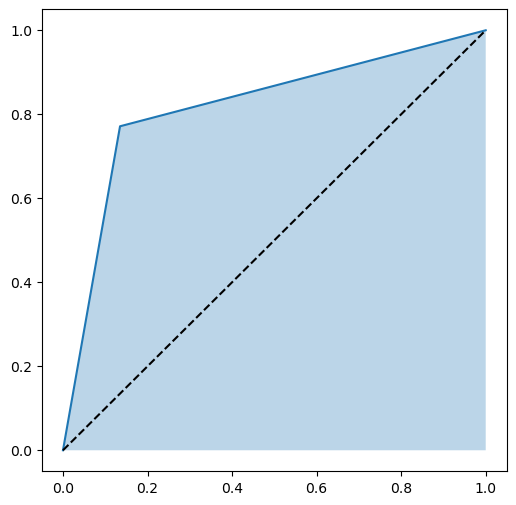

In [529]:
fpr, tpr, ths = roc_curve(y_ts, rfc_y_pred)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr,alpha=.3)
plt.plot((0,1),(0,1),'k--');

# TensorFlow

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            TensorFlow
        </b>
    <br/>&nbsp;    
</center>

In [451]:
# Modelo da rede neural
tfc = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_tr.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
 
# Compilar o modelo
tfc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

 # Treinar o modelo
tfc.fit(X_tr, y_tr, epochs=50, batch_size=32, validation_data=(X_ts, y_ts), verbose=False)

In [452]:
# Avaliar o modelo nos dados de teste
evaluation = tfc.evaluate(X_ts, y_ts)

# Fazer previsões usando o modelo nos dados de teste
predictions = tfc.predict(X_ts)
predicted_labels = (predictions > 0.5).astype("int32")  # Se for um modelo de classificação binária

# Calcular métricas
tf_confusion_matrix = confusion_matrix(y_ts, predicted_labels)
tf_loss_score = tfc.evaluate(X_ts, y_ts)[0]
tf_accuracy_score = tfc.evaluate(X_ts, y_ts)[1]
tf_precision_score = precision_score(y_ts, predicted_labels)
tf_recall_score = recall_score(y_ts, predicted_labels)
tf_f1_score = f1_score(y_ts, predicted_labels)

# ROC AUC
tf_roc_auc = roc_auc_score(y_ts, predictions)

# 0.8208955223880597
# 0.8582089552238806
np.mean(y_ts == np.ravel(predicted_labels))

9/9 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8582


0.8582089552238806

# GradientBoostingClassifier

In [474]:
# Criar e treinar o modelo Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

In [475]:
gbc.fit(X_tr, y_tr)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [476]:
# Fazer previsões usando Gradient Boosting Classifier
gbc_y_pred = gbc.predict(X_ts)

# MATRIZ CONFUSÃO
gbc_confusion_matrix = confusion_matrix(y_ts, gbc_y_pred)

# ACURÁCIA
gbc_accuracy_score = accuracy_score(y_ts, gbc_y_pred)

# PRECISION
gbc_precision_score = precision_score(y_ts, gbc_y_pred)

# RECALL (SENSIBILIDADE)
gbc_recall_score = recall_score(y_ts, gbc_y_pred)

# F1 SCORE
gbc_f1_score = f1_score(y_ts, gbc_y_pred)

# ROC AUC
gbc_roc_auc = roc_auc_score(y_ts, gbc_y_pred)

# 0.8694029850746269
np.mean(y_ts == gbc_y_pred)

0.8694029850746269

# Comparativo dos modelos

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Métricas - modelos de classificação
        </b>
    <br/>&nbsp;
</center>

In [583]:
# data frame modelos
dfm = {
    'modelo':['Support Vector Machine', 'Extra Trees Classifier', 'KNeighbors Classifier', 'Logistic Regression', 'Random Forest Classifier', 'TensorFlow', 'Gradient Boosting Classifier'],
    'accuracy':[svm_accuracy_score, etc_accuracy_score, neigh_accuracy_score, lr_accuracy_score, rfc_accuracy_score, tf_accuracy_score, gbc_accuracy_score],
    'recall':[svm_recall_score, etc_recall_score, neigh_recall_score, lr_recall_score, rfc_recall_score, tf_recall_score, gbc_recall_score],
    'precision':[svm_precision_score, etc_precision_score, neigh_precision_score, lr_precision_score, rfc_precision_score, tf_precision_score, gbc_precision_score],
    'f1_score':[svm_f1_score, etc_f1_score, neigh_f1_score, lr_f1_score, rfc_f1_score, tf_f1_score, gbc_f1_score],
    'roc_auc':[svm_roc_auc, etc_roc_auc, neigh_roc_auc, lr_roc_auc, rfc_roc_auc, tf_roc_auc, gbc_roc_auc],
    'VN': [svm_confusion_matrix[0][0], etc_confusion_matrix[0][0], neigh_confusion_matrix[0][0], lr_confusion_matrix[0][0], rfc_confusion_matrix[0][0], tf_confusion_matrix[0][0], gbc_confusion_matrix[0][0]],
    'VP': [svm_confusion_matrix[1][1], etc_confusion_matrix[1][1], neigh_confusion_matrix[1][1], lr_confusion_matrix[1][1], rfc_confusion_matrix[1][1], tf_confusion_matrix[1][1], gbc_confusion_matrix[1][1]],
    'FN': [svm_confusion_matrix[0][1], etc_confusion_matrix[0][1], neigh_confusion_matrix[0][1], lr_confusion_matrix[0][1], rfc_confusion_matrix[0][1], tf_confusion_matrix[0][1], gbc_confusion_matrix[0][1]],
    'FP': [svm_confusion_matrix[1][0], etc_confusion_matrix[1][0], neigh_confusion_matrix[1][0], lr_confusion_matrix[1][0], rfc_confusion_matrix[1][0], tf_confusion_matrix[1][0], gbc_confusion_matrix[1][0]]
      }
modelos = pd.DataFrame(dfm)
modelos.sort_values(by='f1_score', ascending=False).style.highlight_max(color = "darkblue", subset=list(modelos.columns.drop(['modelo'])))

,modelo,accuracy,recall,precision,f1_score,roc_auc,VN,VP,FN,FP
0,Support Vector Machine,0.869403,0.847619,0.824074,0.835681,0.865527,144,89,19,16
6,Gradient Boosting Classifier,0.869403,0.847619,0.824074,0.835681,0.865527,144,89,19,16
3,Logistic Regression,0.861940,0.838095,0.814815,0.826291,0.857698,143,88,20,17
4,Random Forest Classifier,0.865672,0.790476,0.855670,0.821782,0.852293,149,83,14,22
1,Extra Trees Classifier,0.858209,0.742857,0.876404,0.804124,0.837686,152,78,11,27
5,TensorFlow,0.858209,0.733333,0.885057,0.802083,0.886766,153,77,10,28
2,KNeighbors Classifier,0.847015,0.733333,0.855556,0.789744,0.826789,150,77,13,28


# Sumission para o Kaggle - 2

In [505]:
df_test_nr.tail()

,PassengerId,Age,Fare,Sex_bin,familySize,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Pclass_2,Pclass_3,Survived
413,1305,-0.415368,-0.493353,0,1,0,1,0,1,0,0,0,1,0
414,1306,0.740683,1.314476,1,1,0,0,0,0,0,1,0,0,1
415,1307,0.702070,-0.507694,0,1,0,1,0,1,0,0,0,1,0
416,1308,-0.415368,-0.493353,0,1,0,1,0,1,0,0,0,1,0
417,1309,-0.415368,-0.236863,0,3,0,0,0,0,0,0,0,1,1


In [497]:
# aplicar a submissão com o melhor modelo do projeto com base nas métricas
# model = rfc
model = svm
nameModel = 'svm'

In [483]:
X_test = df_test_nr.drop(['PassengerId'], axis=1)

In [484]:
X_test.tail()

,Age,Fare,Sex_bin,familySize,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Pclass_2,Pclass_3
413,-0.415368,-0.493353,0,1,0,1,0,1,0,0,0,1
414,0.740683,1.314476,1,1,0,0,0,0,0,1,0,0
415,0.702070,-0.507694,0,1,0,1,0,1,0,0,0,1
416,-0.415368,-0.493353,0,1,0,1,0,1,0,0,0,1
417,-0.415368,-0.236863,0,3,0,0,0,0,0,0,0,1


In [485]:
y_pred = model.predict(X_test)

In [486]:
df_test_nr['Survived'] = y_pred

In [504]:
df_test_nr.tail(3)

,PassengerId,Age,Fare,Sex_bin,familySize,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Pclass_2,Pclass_3,Survived
415,1307,0.702070,-0.507694,0,1,0,1,0,1,0,0,0,1,0
416,1308,-0.415368,-0.493353,0,1,0,1,0,1,0,0,0,1,0
417,1309,-0.415368,-0.236863,0,3,0,0,0,0,0,0,0,1,1


In [488]:
sub = df_test_nr[['PassengerId','Survived']]

In [489]:
sub.shape

(418, 2)

In [502]:
# Salvar com o nome do arquivo atual em variável para salvar a predição com mesmo nome
# by geanclm on 16/12/2023
file_path = os.getcwd()
for _, _, arquivo in os.walk(file_path):
    # print(arquivo)
    file = arquivo[2][:35]
# - - -
current_date = datetime.today().strftime('%Y-%m-%d_')
# - - -
file_name = f'{file}{current_date}{nameModel}.csv'
# sub.to_csv(file_name, header=True, index=False)
sub.to_csv(file_name, header=True, index=False)

In [503]:
file_name

'CLASSIFICAÇÃO_Titanic_Kaggle_csv_2-2023-12-24_svm.csv'

In [501]:
# !type gender_submission.csv
# !type {file_name}

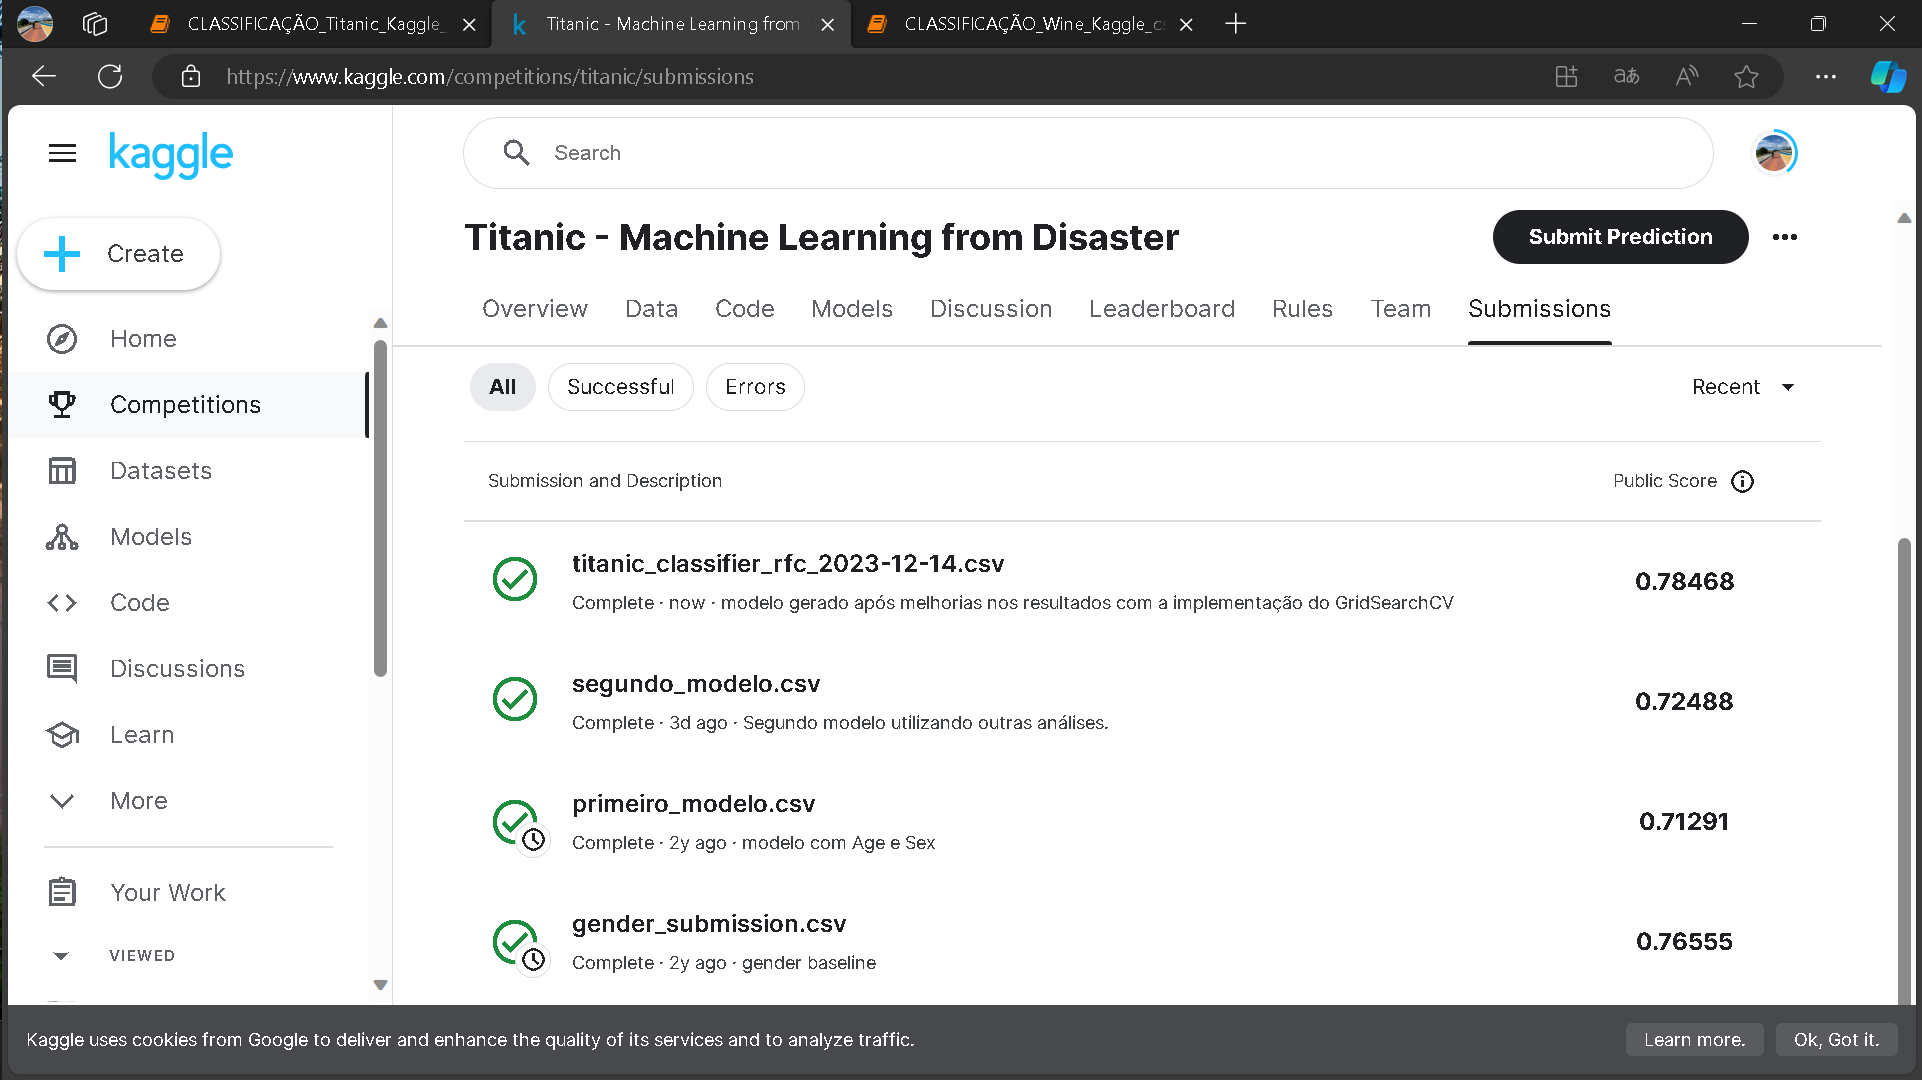

# INSHIGHTS

In [467]:
# 1 - eliminar registros com dado de idade faltante
# 2 - arredondar idade
# 3 - converter coluna Age para inteiro
# 4 - Importante pensar em TREINO, VALIDAÇÃO e TESTE com a base existente
# 5 - Meta de atingir pelo menos 0.9 de avaliação no Kaggle

# Para analisar ainda no dados de treino
# 6 - Trabalhar a coluna "Age" de acordo com os títulos de cada passageiros para atribuir uma idade média mis próxima do real;
# 7 - feature engineering com as colunas "SibSp" e "Parch" para uma única coluna com a somtória de parentes de cada passageiro do Titanic